<a href="https://colab.research.google.com/github/gedonis/bankex_foundation_education/blob/master/ProductStars_Webinar_Telecom_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Предсказываем отток пользователей (Customer Churn)

Телеком, интернет-провайдеры, страховые компании и службы мониторинга часто используют анализ оттока клиентов в качестве одной из своих ключевых бизнес-метрик, поскольку стоимость удержания существующего клиента намного меньше, чем приобретение нового. Компании из этих секторов часто имеют филиалы по обслуживанию клиентов, которые пытаются отвоевать дефектных клиентов, потому что выздоровевшие долгосрочные клиенты могут стоить компании гораздо больше, чем вновь набранные клиенты.


Компании обычно проводят различие между **добровольным** оттоком и **непроизвольным** оттоком. Добровольный отток происходит из-за решения клиента перейти на другую компанию или поставщика услуг, недобровольный отток происходит из-за обстоятельств, таких как переезд клиента или по здоровью. В большинстве приложений непроизвольные причины оттока исключаются из аналитических моделей. Аналитики, как правило, концентрируются на добровольном оттоке, поскольку это обычно происходит из-за факторов взаимоотношений компании и клиента, которые контролируются компаниями, таких как обработка счетов и оплаты или поддержки после покупки.


Предиктивная аналитика использует модели прогнозирования оттока, которые прогнозируют отток клиентов, оценивая их склонность к риску оттока. Поскольку эти модели генерируют небольшой приоритетный список потенциальных перебежчиков, они эффективны при сосредоточении маркетинговых программ удержания клиентов на подмножестве клиентской базы, которые наиболее уязвимы для оттока клиентов.

Данные для анализа по ссылке: https://is.gd/productstar_data 


# 1. Обработка данных

In [0]:
import pandas as pd #обработка данных, загрузка-выгрузка CSV (н-р, pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

#считываем данные по пути к файлу с данными
telcom = pd.read_csv(r"/content/sample_data/Telco-Customer-Churn.csv")
#выводим первые строки
telcom.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## 1.1. Обзор данных

In [0]:
#Выводим данные
print ("Строки     : " ,telcom.shape[0])
print ("Колонки    : " ,telcom.shape[1])
print ("\nПоля     : \n" ,telcom.columns.tolist())
print ("\nОтсутствущие значения :  \n", telcom.isnull().sum().values.sum())
print ("\nУникальные значения  :  \n",telcom.nunique())

Строки     :  7043
Колонки    :  21

Поля     : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Отсутствущие значения :  
 0

Уникальные значения  :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


##1.2. Обработка данных (манипуляция)

[Более подробно о функциях apply и lambda](https://towardsdatascience.com/apply-and-lambda-usage-in-pandas-b13a1ea037f7)

In [0]:
#подключаем линейную алгебру
import numpy as np 

#Заменяем пробелы на 'null' в колонках с общими тратами "TotalCharges"
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan)

#Опускаем нулевые значения в колонках с общими тратами, в которых .15% данных отсутствуют
telcom = telcom[telcom["TotalCharges"].notnull()]
telcom = telcom.reset_index()[telcom.columns]

#конвертируем во float
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)

#заменяем 'No internet service' на 'No' для следующих колонок
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})
    
#заменяем значения
telcom["SeniorCitizen"] = telcom["SeniorCitizen"].replace({1:"Yes",0:"No"})

#переопределяем категории длительности существования клиента (в месяцах)
def tenure_lab(telcom) :
    
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"

#заполняем подходящими данными колонку tenure_group, используя умную функцию lambda
telcom["tenure_group"] = telcom.apply(lambda telcom:tenure_lab(telcom),
                                      axis = 1)

#разделяем отток от текущих пользователей в новых таблицах
churn     = telcom[telcom["Churn"] == "Yes"]
not_churn = telcom[telcom["Churn"] == "No"]

#определяющие поля
Id_col     = ['customerID']
target_col = ["Churn"]

#разделяем категорические и численные поля в списках
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

#2. Визуализация исходных данных

## 2.1 Подключение библиотек для визуализации

In [0]:
#включение файлов в директории "../input/"
import os
#import matplotlib.pyplot as plt #для визуализации
from PIL import  Image
%matplotlib inline
#import seaborn as sns #для визуализации
#import itertools
#import io
import plotly
import plotly.offline as py #для визуализации
py.init_notebook_mode(connected=True) #для визуализации, используется для оффлайн-обработки в colab
import plotly.graph_objects as go #для визуализации
import plotly.tools as tls #для визуализации
import plotly.figure_factory as ff #для визуализации

#для исключения проблемной отрисовки в colab
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

## 2.2. Визуализация доли оттока в базе данных

In [0]:
print(telcom['Churn'].value_counts())

#лейблы
lab = telcom["Churn"].value_counts().keys().tolist()

#значения
val = telcom["Churn"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5,
              )
layout = go.Layout(dict(
                        #title = "Churn rate",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        annotations = [
                                          {
                                           "font": {
                                                      "size": 20
                                                    },
                                            "showarrow": False,
                                            "text": "Доля оттока",
                                           
                                          }
                        ]
                       )
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)

configure_plotly_browser_state()
fig.show()

#plotly.__version__

No     5163
Yes    1869
Name: Churn, dtype: int64


## 2.3. Дополнительная обработка данных

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#колонка с ID пользователя
Id_col     = ['customerID']
#целевая колонка
target_col = ["Churn"]
#категорические колонки
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#числовые колонки
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]
#бинарные колонки с двумя значениями
bin_cols   = telcom.nunique()[telcom.nunique() == 2].keys().tolist()
#колонки с более, чем двумя значениями
multi_cols = [i for i in cat_cols if i not in bin_cols]

#кодировщик лейблов для бинарных колонок
le = LabelEncoder()
for i in bin_cols :
    telcom[i] = le.fit_transform(telcom[i])
    
#дублируем для многозначных колонок
telcom = pd.get_dummies(data = telcom,columns = multi_cols )

#расширяем числовые колонки
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#сбрасываем предыдущие значения с объед.
df_telcom_og = telcom.copy()
telcom = telcom.drop(columns = num_cols,axis = 1)
telcom = telcom.merge(scaled,left_index=True,right_index=True,how = "left")

## 2.4. Корреляционная матрица



In [0]:
configure_plotly_browser_state()

#корреляция
correlation = telcom.corr()

#обозначаем лейблы 
matrix_cols = correlation.columns.tolist()

#конвертируем в массив
corr_array  = np.array(correlation)

#рисуем
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Коэффициент корреляции Пирсона",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(annotations = [
                                          {
                                           "font": {
                                                      "size": 16
                                                    },
                                            "showarrow": False,
                                            "text": "Корреляционная матрица",
                                            "x": 20,
                                            "y": 35
                                          }
                        ],
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

#3. Построение Baseline модели

**Матрица ошибок и ROC-кривая**

Определения TP, FP, TN и FN
Давайте разберемся в терминологии, которую мы будем часто использовать в понимании кривых ROC:



*   **TP** = True Positive - Модель правильно предсказала положительный класс, чтобы быть положительным классом.
*   **FP** = False Positive - модель неверно предсказала отрицательный класс как положительный.
*   **FN** = False Negative - модель неверно предсказала положительный класс как отрицательный.
*   **TN** = True Negative - модель правильно предсказала отрицательный класс как отрицательный.

![alt text](https://i.imgur.com/L52wXaL.png)


В количественном выражении это будет выглядеть так:

P – число истинных результатов, P = TP + FN;
N – число ложных результатов, N = TN + FP.


![пример](https://www.bigdataschool.ru/wp-content/uploads/2020/01/%D0%BF%D1%80%D0%BE%D0%B3_3.png)

Чтобы нарисовать ROC-кривую, нужны только TPR и FPR. 

TPR определяет количество правильных положительных результатов среди всех положительных образцов, доступных во время теста. FPR, с другой стороны, определяет, сколько неверных положительных результатов встречается среди всех отрицательных образцов, доступных во время теста.

Пространство ROC определяется FPR и TPR как оси x и y соответственно, которые отображают относительные компромиссы между истинным положительным (выгоды) и ложным положительным (затраты). Так как TPR эквивалентен чувствительности, а FPR равен 1-специфичности, график ROC иногда называют графиком чувствительности против (1-специфичности). Каждый результат прогнозирования или экземпляр матрицы путаницы представляет одну точку в пространстве ROC.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/ROC_space-2.png/800px-ROC_space-2.png)

Наилучший из возможных методов прогнозирования даст точку в верхнем левом углу или координату (0,1) пространства ROC, представляющую 100% чувствительность (без ложных негативов) и 100% специфичность (без ложных срабатываний). Точка (0,1) также называется совершенной классификацией. Случайное предположение дало бы точку вдоль диагональной линии (так называемая линия отсутствия дискриминации) от левого нижнего до правого верхнего угла (независимо от положительных и отрицательных базовых показателей). Интуитивно понятный пример случайного угадывания - это решение, подбрасывающее монеты. По мере увеличения размера выборки точка ROC случайного классификатора стремится к диагональной линии. В случае сбалансированной монеты она будет стремиться к точке (0,5, 0,5).

Диагональ делит пространство РПЦ. Точки над диагональю представляют хорошие результаты классификации (лучше случайных); точки ниже линии представляют плохие результаты (хуже случайных). Обратите внимание, что выходные данные постоянно плохого предиктора могут быть просто инвертированы для получения хорошего предиктора.

> **Задача.** Какой метод из A, B, C, C' точней классифицирует?
![alt text](https://i.imgur.com/TKYyRa6.png)

[Подробней с примерами на Python](https://stackabuse.com/understanding-roc-curves-with-python/)


In [0]:
configure_plotly_browser_state()

#Загрузка библиотек

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score

import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score

from yellowbrick.classifier import DiscriminationThreshold

#разбиваем данные для обучения и теста 
train,test = train_test_split(telcom,test_size = .25 ,random_state = 111)
    
#разбиваем зависимые и независимые переменные
cols    = [i for i in telcom.columns if i not in Id_col + target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

#атрибуты функции
#dataframe     - для работы с данными
#Algorithm     - использованный алгоритм
#training_x    - данные для предсказывающих переменных (обучение)
#testing_x     - данные для предсказывающих переменных (тест)
#training_y    - целевая переменная (обучение)
#training_y    - целевая переменная (тест)
#cf - ["coefficients","features"](коэффициенты для логрегрессии, параметры для деревьев)

#threshold_plot - если True, возвращает для модели threshold plot
    
def telecom_churn_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot) :
    
    #модель
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    #коэффициенты
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Отчет по классфицикации : \n",classification_report(testing_y,predictions))
    print ("Точность : ",accuracy_score(testing_y,predictions))
    #confusion_matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Площадь под кривой : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    #готовим confusion_matrix для рисования
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Пользователи","Отток"],
                        y = ["Пользователи","Отток"],
                        showscale  = False, colorscale = "Picnic",
                        name = "matrix",
                        )
    
    #готовим roc_curve для рисования
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #готовим коэффициенты для рисования
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    #рисуем
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            #subplot_titles=('Confusion Matrix',
                            #                'ROC',
                            #                'Значимость')
                            )
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195),
                         #annotations = [
                         #                 {
                         #                  "font": {
                         #                             "size": 20
                         #                           },
                         #                   "showarrow": False,
                         #                   "text": "Показатели модели",
                         #                   "x": 0.1,
                         #                   "y": 1.2
                         #                 }*/
                         #]
                         )
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()

Определяем дефолтную модель через логистическую регрессию. 

In [0]:
#определяем дефолтную модель через логистическую регрессию
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Запускаем baseline-модель


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Отчет по классфицикации : 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1268
           1       0.69      0.53      0.60       490

    accuracy                           0.80      1758
   macro avg       0.76      0.72      0.73      1758
weighted avg       0.79      0.80      0.79      1758

Точность :  0.8026166097838453
Площадь под кривой :  0.7185443893645785 



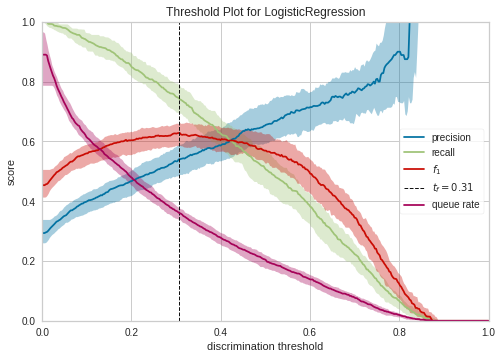

In [0]:
configure_plotly_browser_state()
warnings.filterwarnings("ignore")

#запускаем модель
telecom_churn_prediction(logit,train_X,test_X,train_Y,test_Y,
                         cols,"coefficients",threshold_plot = True) 